# Coordinate alignment between multi-slices

This notebook demonstrates the process of Aligning spatial transcriptome data. This is done in the following two steps.

1. Align spatial transcriptome data from a set of multi-slices;
2. Align spatial transcriptome data from two sets of multi-slices simultaneously.
3. Reduce the amount of data by sampling to improve alignment speed.

 Here we modified a published method PASTE, which utilized Fused Gromov-Wasserstein Optimal Transport (FGW-OT) algorithm, to leverages
 both gene expression similarity and spatial distances between spots to align and integrate spatial transcriptomics data.

 **Reference**: Ron Zeira, Max Land, Benjamin J. Raphael. Alignment and Integration of Spatial Transcriptomics Data. bioRxiv, 2021.03.16.435604.
                doi: https://doi.org/10.1101/2021.03.16.435604

## Packages

In [1]:
import os
import sys

sys.path.insert(0, "/home/yao/PythonProject/Test_packages/dynamo-release")
sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/spateo-release")
import dynamo as dyn
import spateo as st

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/home/yao/.local/lib/python3.8/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spaghetti/network.py:36: Future

## Data source

In [3]:
# cellbin data
cellbin_files = [filename for root1, dirs1, files1 in os.walk("cellbin_h5ad") for filename in files1][:10]
cellbin_slices = [st.read_h5ad(os.path.join("cellbin_h5ad", slices1_file)) for slices1_file in cellbin_files]

# binning data
binning_files = [filename for root2, dirs2, files2 in os.walk("bin20_h5ad") for filename in files2][:10]
binning_slices = [st.read_h5ad(os.path.join("bin20_h5ad", slices2_file)) for slices2_file in binning_files]

## Align spatial transcriptome data from a set of multi-slices

### Slices alignment

In [4]:
cellbin_slices_sample = [slice.copy() for slice in cellbin_slices]
align_cellbin_slices = st.tl.models_align(
    models=cellbin_slices_sample,
    spatial_key="spatial",
    key_added="align_spatial",
    numItermax=200,
    numItermaxEmd=500000,
    device="0"
)

|-----> [Models alignment] in progress: 11.1111%|-----------> Filtered all samples for common genes. There are 6326 common genes.
|-----> [Models alignment] in progress: 22.2222%|-----------> Filtered all samples for common genes. There are 7661 common genes.
|-----> [Models alignment] in progress: 33.3333%|-----------> Filtered all samples for common genes. There are 8095 common genes.
|-----> [Models alignment] in progress: 44.4444%|-----------> Filtered all samples for common genes. There are 8630 common genes.
|-----> [Models alignment] in progress: 55.5556%|-----------> Filtered all samples for common genes. There are 7874 common genes.
|-----> [Models alignment] in progress: 66.6667%|-----------> Filtered all samples for common genes. There are 7728 common genes.
|-----> [Models alignment] in progress: 77.7778%|-----------> Filtered all samples for common genes. There are 8344 common genes.
|-----> [Models alignment] in progress: 88.8889%|-----------> Filtered all samples for com

### Visualize slices based on aligned coordinates

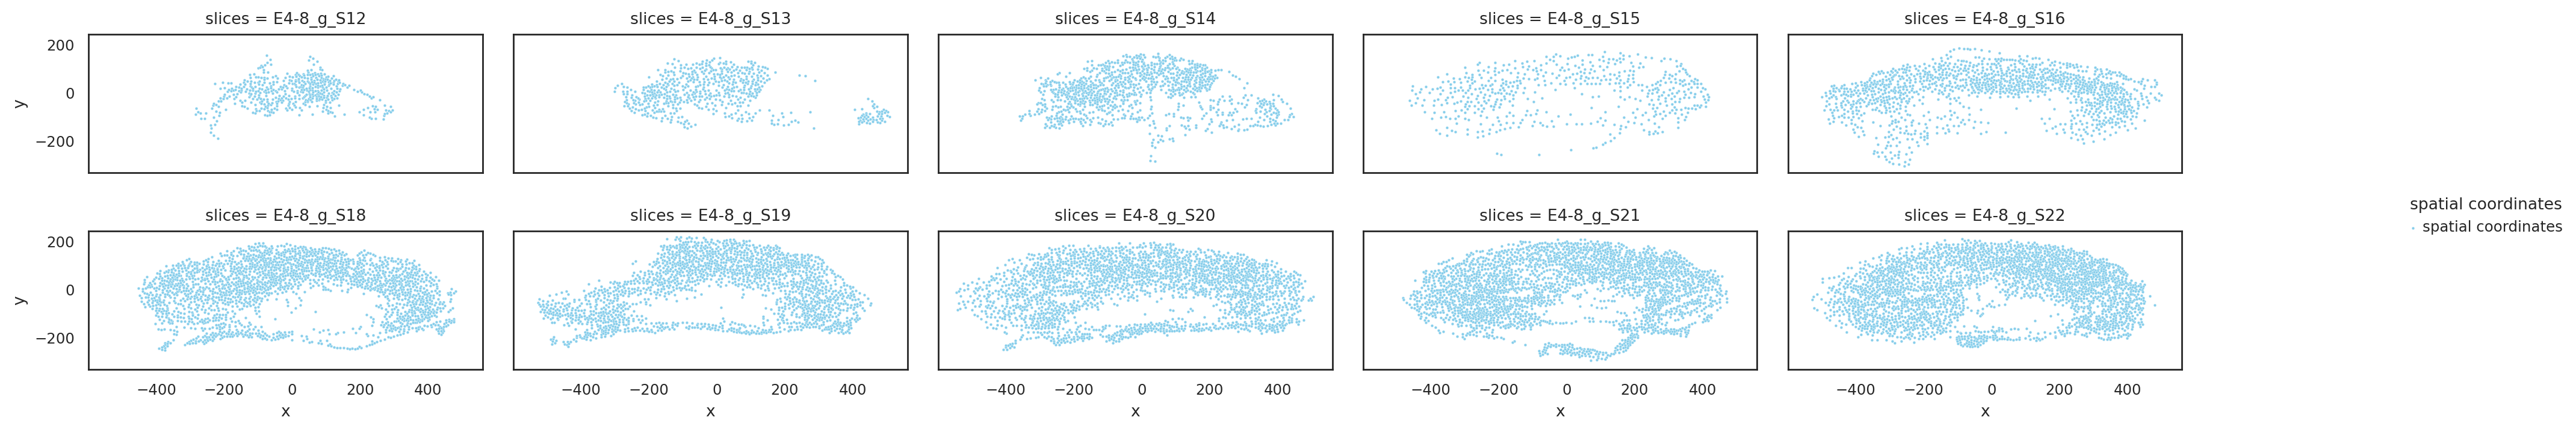

In [5]:
st.pl.multi_slices(
    slices=align_cellbin_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=3,
    ax_height=0.5,
    ncols=5,
)

## Align spatial transcriptome data from two sets of multi-slices simultaneously

### Slices alignment

In [6]:
cellbin_slices_sample = [slice.copy() for slice in cellbin_slices]
binning_slices_sample = [slice.copy() for slice in binning_slices]
align_cellbin_slices, align_binning_slices = st.tl.models_align_ref(
    models=cellbin_slices_sample,
    models_ref=binning_slices_sample,
    spatial_key="spatial",
    key_added="align_spatial",
    numItermax=500,
    numItermaxEmd=100000,
    device="0"
)

|-----> [Models alignment] in progress: 11.1111%|-----------> Filtered all samples for common genes. There are 6326 common genes.
|-----> [Models alignment] in progress: 22.2222%|-----------> Filtered all samples for common genes. There are 7661 common genes.
|-----> [Models alignment] in progress: 33.3333%|-----------> Filtered all samples for common genes. There are 8095 common genes.
|-----> [Models alignment] in progress: 44.4444%|-----------> Filtered all samples for common genes. There are 8630 common genes.
|-----> [Models alignment] in progress: 55.5556%|-----------> Filtered all samples for common genes. There are 7874 common genes.
|-----> [Models alignment] in progress: 66.6667%|-----------> Filtered all samples for common genes. There are 7728 common genes.
|-----> [Models alignment] in progress: 77.7778%|-----------> Filtered all samples for common genes. There are 8344 common genes.
|-----> [Models alignment] in progress: 88.8889%|-----------> Filtered all samples for com

### Visualize slices based on aligned coordinates

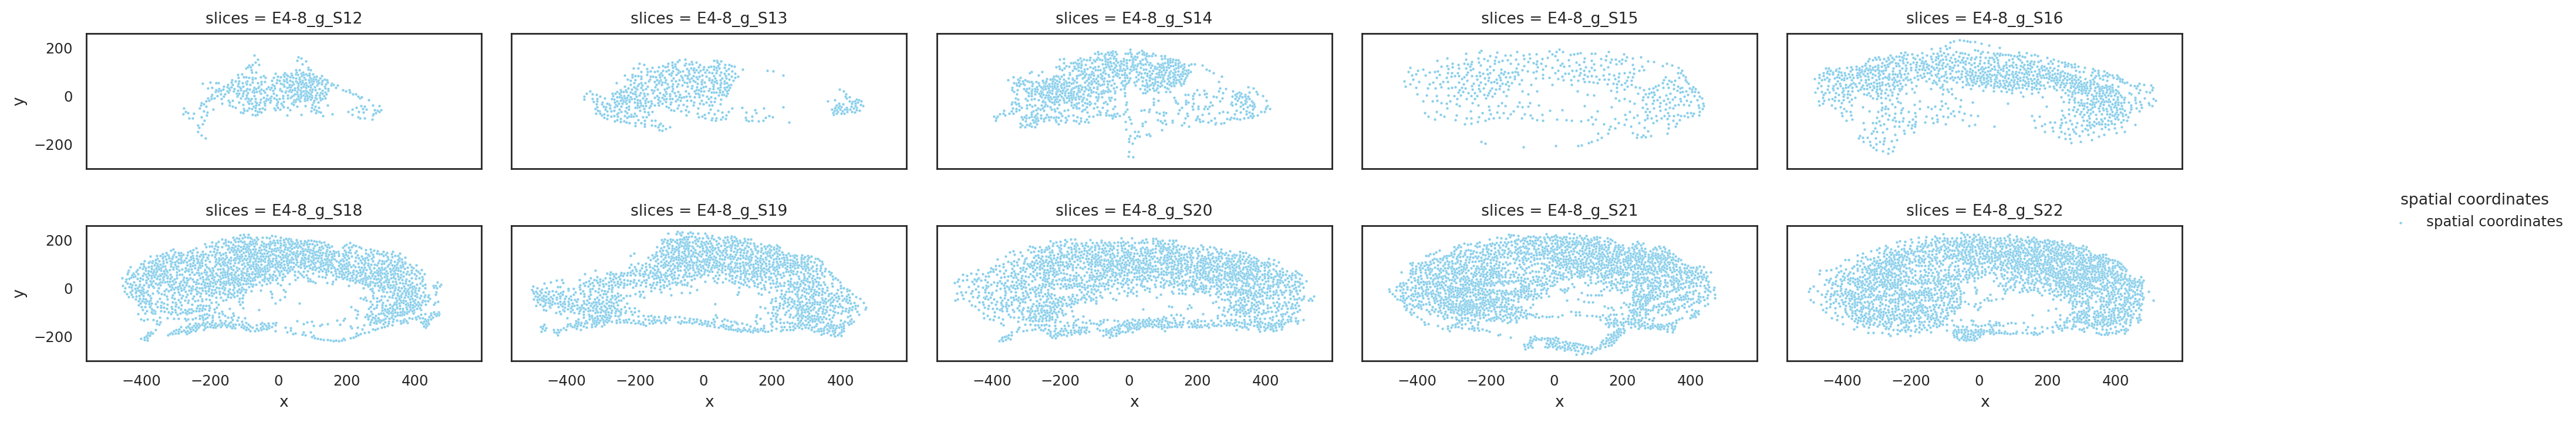

In [7]:
st.pl.multi_slices(
    slices=align_cellbin_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=3,
    ax_height=0.5,
    ncols=5,
)

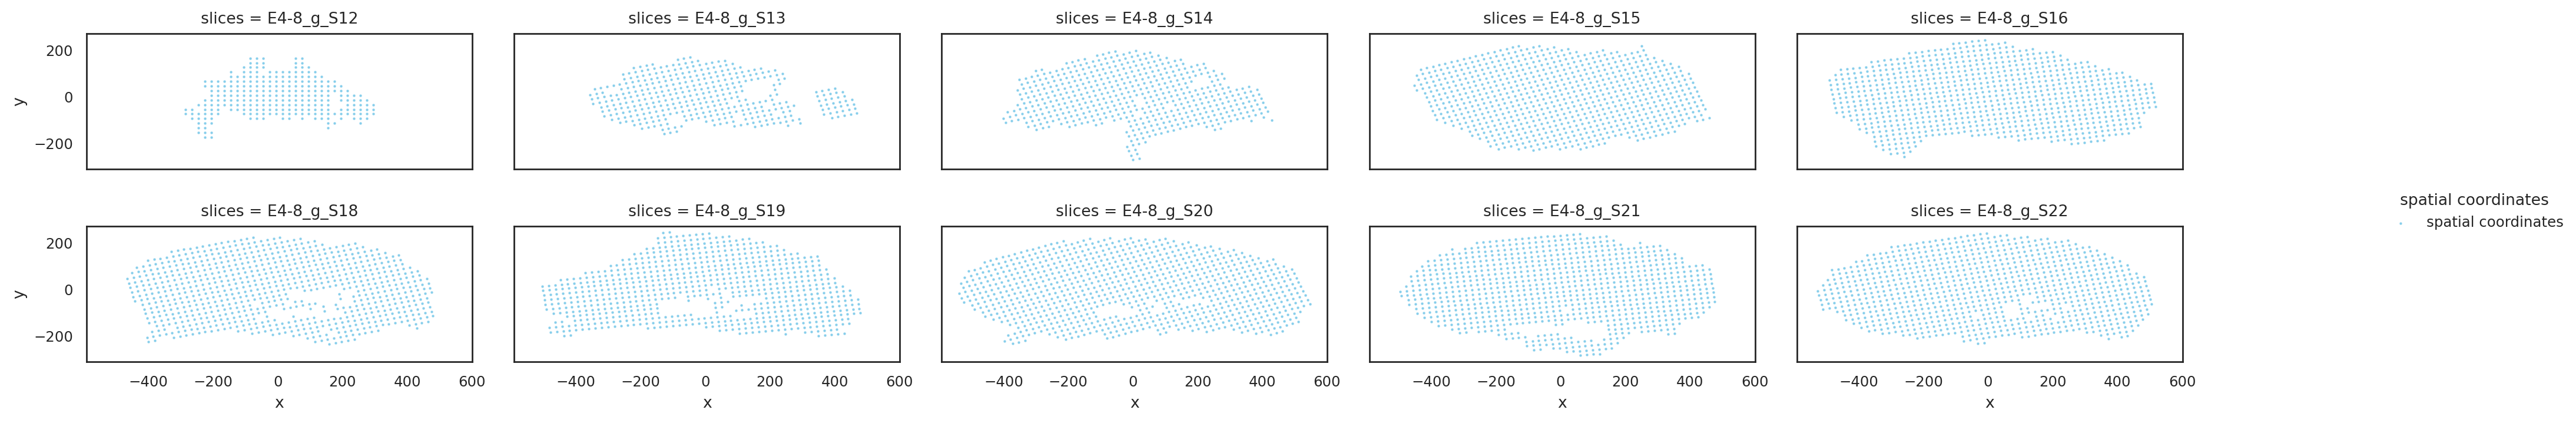

In [9]:
st.pl.multi_slices(
    slices=align_binning_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=3,
    ax_height=0.5,
    ncols=5,
)

## Reduce the amount of data by sampling to improve alignment speed

### Slices alignment

In [12]:
cellbin_slices_sample = [slice.copy() for slice in cellbin_slices]
align_cellbin_slices, _ = st.tl.models_align_ref(
    models=cellbin_slices_sample,
    models_ref=None,
    n_sampling=500,
    sampling_method="trn",
    spatial_key="spatial",
    key_added="align_spatial",
    numItermax=500,
    numItermaxEmd=100000,
    device="0"
)

|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [24.1195s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [23.8375s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [23.8127s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [23.7474s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [23.9343s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [24.2522s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [24.0950s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [24.2723s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [23.9137s]
|-----> [Running TRN] in progress: 100.0000%
|-----> [Running TRN] finished [24.1875s]
|-----> [Models alignment] in progress: 11.1111%|-----------> Filtered all samples for common genes. There are 6326 common genes.


### Visualize slices based on aligned coordinates

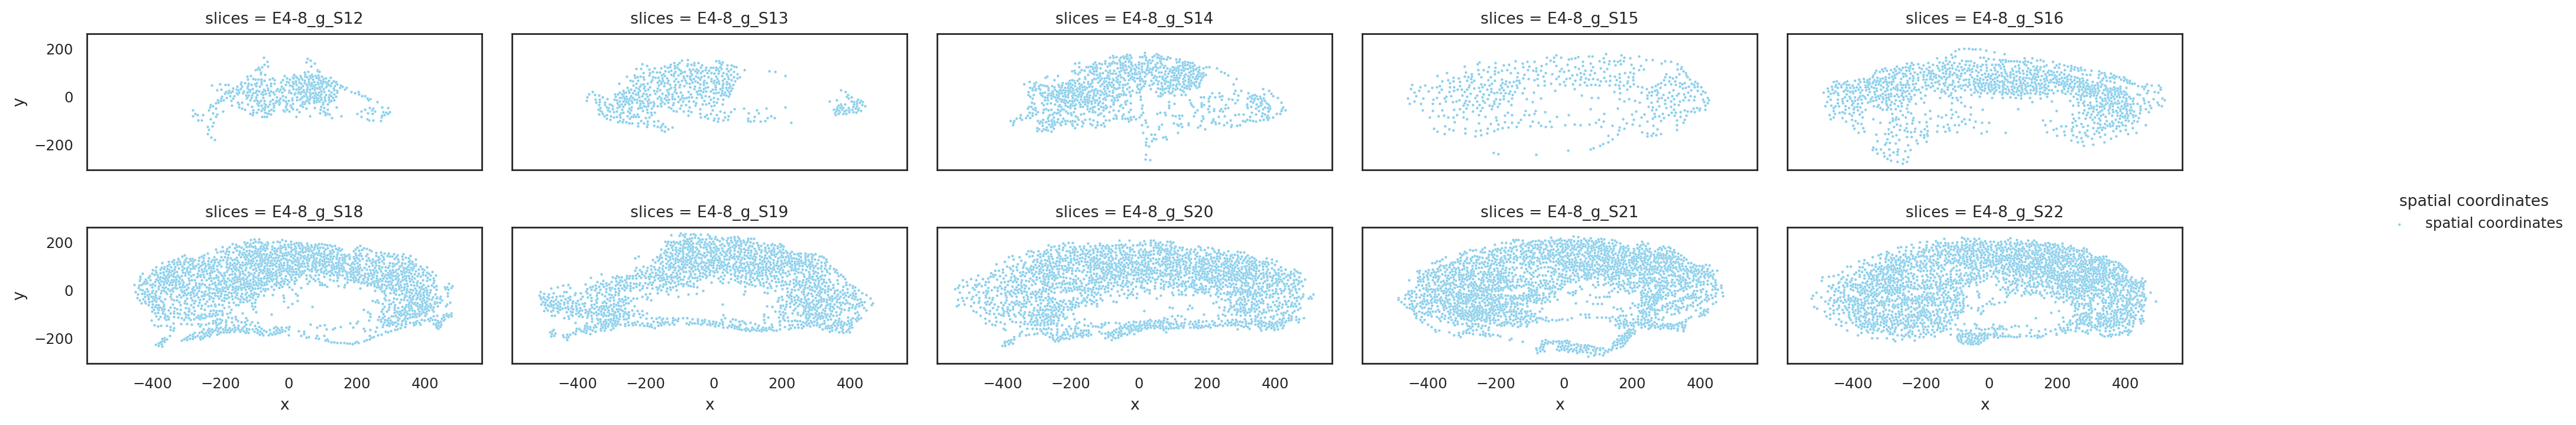

In [13]:
st.pl.multi_slices(
    slices=align_cellbin_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=3,
    ax_height=0.5,
    ncols=5,
)